# <span style="color:blue"> 이토록 쉬운 통계 & R </span>

<img src="../image/cover.png" width="200" height="400" align="left">  임경덕 지음

## PART 4 데이터 분석 도구, R

## 95% R로 분석 다시보기-2-treat-4-선형대수기초 대응분석관련-1 (41일차)

   * 데이타프로젝트 (http://dataproject.xyz) 또는 (http://cafe.naver.com/dataartproject) 에 미리 저장된 스크립트를 다운 받을 수 있습니다.
   * 스크립트를 활용하면 직접 명령어를 입력하지 않고 저장된 명령어들을 실행할 수 있습니다.

### 데이터 파일은 dataartproject.xyz 에 있습니다.

# 두개의 범주형 변수의 관계 찾기 -- treat - 대응분석 정리

## 진료과목 중 내과만 자세히 살피기  -- 대응분석

공공 테이터 포털 (data.go.kr) 에서 각 정부부처에서 공개한 데이터들을 볼 수 있습니다. 그 중에서 건강보험공간에서 공개한 100만 건의 진료내역 정보를 살펴 봅시다. 원본 데이터는 2015년 약 100만건의 진료내역을 담고 있으나. 우리는 서울의 외래 진료내역인 약 200만건 데이터를 살펴 볼 것입니다.

## 대응분석 관련 정리

대응분석을 설명하기 위해서는 몇가지 기본적인 내용의 정리가 필요합니다. 따라서 관련 내용을 먼저 정리 하고 진료 과목에 대한 대응 분석을 설명할 예정입니다.
여기서 대응분석이라는 것은 일반적으로 두개의 범주형 변수의 관계에 대한 독립성 여부는 카이제곱 분석에 의하여 P 검정을 살펴보게 됩니다.

그러나 다수준인 경우에는 분석시에 복잡한 양상을 띄게 됩니다. 따라서 이 경우에는 수준별 대응 분석을 하게 됩니다. 대응분석은 범주형 변수의 각 수준을 계량화하여 2차원 그래프 상에서 표현하여 두 범주형 변수가 변화는 관계를 살펴보는 것입니다.

이런 내용을 이해 하기 위해서는 선형 대수와 관련 해서 몇가지 기초적인 지식이 필요합니다.

### 고유값 과 고유벡터 (Eigen Value & EigenVector)
https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix

#### 정의

* $\mathbf A$ 를 $n \times n$ 실수 혹은 복수수 행렬이고, $\mathbf E$ 를 $n \times 1$ 인 행렬 또는 벡터라고 하고 다음의 조건을 만족 한다고 하자.

$$ \mathbf A \mathbf E = \lambda \mathbf E$$

* 0 이 아닌 어떤 벡터 $\mathbf E$ 에 대해서 실수 혹은 복소수 $\lambda$ 를 $\mathbf A$ 의 **고유값(eigenvalue)** 혹은 **특성값(characteristic value)** 라고 합니다.
* $n \times 1$ 행렬 또는 벡터 $\mathbf E$ 를 고유값 $\lambda$ 에 관한 **고유벡터(eigenvector)** 혹은 **특성벡터(characteristic vector)** 또는 **종행렬(column matrix)** 라고 합니다.
* $\mathbf A \mathbf E$ 의 방향은 $\mathbf E$ 의 방향과 평행합니다.
* $\alpha \neq 0$ 이고 $\mathbf A \mathbf E = \lambda \mathbf E$ 이면 $\mathbf A(\alpha \mathbf E) = \alpha(\lambda \mathbf E) = \lambda (\alpha \mathbf E)$ 즉 고유벡터의 0 이 아닌 스칼라 곱도 고유 벡터 입니다.

#### 고유벡터와 고유값 예

1. 예 1.

$$
\mathbf A = \begin{pmatrix} 1 & 0 \\ 0 & 0 \\ \end{pmatrix}  \qquad \mathbf A \mathbf E =  \begin{pmatrix} 1 & 0 \\ 0 & 0 \\ \end{pmatrix}  \begin{pmatrix} 0 \\ 4 \\ \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ \end{pmatrix} = \lambda \mathbf E = 0 \begin{pmatrix} 0 \\ 4 \\ \end{pmatrix}
$$

* 정의에 의하여 고유벡터는 $\begin{pmatrix} 0 \\ 4 \\ \end{pmatrix}$ 이고 고유값은 0 이 된다.

* $\alpha \neq 0$ 인 $\alpha$ 에 대해서 $\begin{pmatrix} 0 \\ 4 \alpha \\ \end{pmatrix}$ 도 고유값 0 인 고유벡터가 된다.

2. 예 2.

$$
\mathbf A = \begin{pmatrix} 1 & -1 & 0 \\ 0 & 1 & 1 \\ 0 & 0 & -1 \\ \end{pmatrix}  \qquad \mathbf A \mathbf E =  \begin{pmatrix} 1 & -1 & 0 \\ 0 & 1 & 1 \\ 0 & 0 & -1 \\ \end{pmatrix}  \begin{pmatrix} 1 \\ 2 \\ -4 \\ \end{pmatrix} = \begin{pmatrix} -1 \\ -2 \\ 4 \\ \end{pmatrix} = \lambda \mathbf E = -1 \begin{pmatrix} 1 \\ 2 \\ -4 \\ \end{pmatrix}
$$

* 정의에 의하여 고유벡터는 $\begin{pmatrix} 1 \\ 2 \\ -4 \\ \end{pmatrix}$ 이고 고유값은 -1 이 된다.

* 마찬가지로 

$$
\mathbf A = \begin{pmatrix} 1 & -1 & 0 \\ 0 & 1 & 1 \\ 0 & 0 & -1 \\ \end{pmatrix}  \qquad \mathbf A \mathbf E =  \begin{pmatrix} 1 & -1 & 0 \\ 0 & 1 & 1 \\ 0 & 0 & -1 \\ \end{pmatrix}  \begin{pmatrix} 6 \\ 0 \\ 0 \\ \end{pmatrix} = \begin{pmatrix} 6 \\ 0 \\ 0 \\ \end{pmatrix} = \lambda \mathbf E = 1 \begin{pmatrix} 6 \\ 0 \\ 0 \\ \end{pmatrix}
$$

* 정의에 의하여 고유벡터는 $\begin{pmatrix} 6 \\ 0 \\ 0 \\ \end{pmatrix}$ 이고 고유값은 1 이 된다.

#### 고유값과 고유벡터를 구하는 방법

* $\lambda$ 가 고유벡터 $\mathbf E$ 에 관한 고유값이면 $\mathbf A \mathbf E = \lambda \mathbf E$ 이고 $\lambda \mathbf E - \mathbf A \mathbf E = \mathbf 0$ 이다.

* 고유벡터로 묶으면 $(\lambda \mathbf I  - \mathbf A) \mathbf E = \mathbf 0$ 이고, 방정식 형태로 하면 $(\lambda \mathbf I  - \mathbf A) \mathbf X = \mathbf 0$ 가 된다.
* 이 방정식의 자명하지 않은 해를 가질 필요충분 조건은   $\vert \lambda \mathbf I  - \mathbf A \vert = \mathbf 0$
* 그러므로 $\vert \lambda \mathbf I  - \mathbf A \vert = \mathbf 0$ 일 때 $\lambda$ 는 $\mathbf A$ 의 고유값이 된다.

$$
\vert \lambda \mathbf I  - \mathbf A \vert = \mathbf 0 \Rightarrow \begin{vmatrix} \lambda - a_{11} & -a_{12} & \cdots & -a_{1n} \\ -a_{21} & \lambda - a_{22} & \cdots & -a_{2n} \\ \vdots & \vdots & \vdots & \vdots \\ -a_{n1} & -a_{n2} & \cdots & \lambda - a_{nn} \\ \end{vmatrix} = 0
$$

* 다항식 $\vert \lambda \mathbf I  - \mathbf A \vert$ 는 $\mathbf A$ 의 특성다항식 (characteristic polunomial) 이라 부르며 $P_A(\lambda)$ 라 표시합니다.
* $\mathbf A$ 가 $n \times n$ 행렬이면 $P_A(\lambda)$ 는 n 차 다항식으로 $\mathbf A$ 의 고유값은 실수 혹은 복소수 값을 갖는다.
* $\mathbf A$ 는 n 개의 고유값들 $\lambda_1, \lambda_2,\cdots,\lambda_n$ 을 갖는다. 중복은 가능하다.
* 예를들어 $P_A(\lambda) = (\lambda - 1)(\lambda - 3)^2 (\lambda - i)^4$ 이면
* $\lambda = 1,3,3,i,i,i,i$ 가 된다.

#### 고유값과 고유벡터 예 3.

$\mathbf A = \begin{pmatrix} 1 & -1 & 0 \\ 0 & 1 & 1 \\ 0 & 0 & -1 \\ \end{pmatrix} $ 의 고유값과 고유벡터를 구하세요.

* 특성 다항식 
$$
P_A(\lambda) = \vert \lambda \mathbf I  - \mathbf A \vert = \left \vert \lambda \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \\ \end{pmatrix} - \begin{pmatrix} 1 & -1 & 0 \\ 0 & 1 & 1 \\ 0 & 0 & -1 \\ \end{pmatrix}\right \vert = \begin{vmatrix} \lambda - 1 & 1 & 0 \\ 0 & \lambda - 1 & -1 \\ 0 & 0 & \lambda + 1 \\ \end{vmatrix} = (\lambda - 1)^2(\lambda + 1) = 0
$$

* 고유값 $\lambda$ = 1,1, -1 이 됩니다.

* $\lambda = 1$ 에 대한 고유벡터

$$
(\mathbf 1 \mathbf I_3  - \mathbf A) \mathbf X =  \left \{ \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \\ \end{pmatrix} - \begin{pmatrix} 1 & -1 & 0 \\ 0 & 1 & 1 \\ 0 & 0 & -1 \\ \end{pmatrix}\right \} \mathbf X = \begin{pmatrix} 0 & 1 & 0 \\ 0 & 0 & -1 \\ 0 & 0 & -2 \\ \end{pmatrix} \mathbf X = \begin{pmatrix} 0 & 1 & 0 \\ 0 & 0 & -1 \\ 0 & 0 & -2 \\ \end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ \end{pmatrix} = \mathbf 0
$$

$ x_2 = 0, -x_3 = 0, -2x_3 = 0$ 이고 $x_1$ 은 임의 수이므로 $x_1 = \alpha$ 로 놓을수 있습니다. 따라서

$\mathbf X = \begin{pmatrix} \alpha \\ 0 \\ 0 \\ \end{pmatrix} = \alpha \begin{pmatrix} 1 \\ 0 \\ 0 \\ \end{pmatrix} $


이 됩니다. $X$ 는 null 벡터가 아니므로 $\alpha \neq 0$ 이 되어야 함.

* $\lambda = -1$ 에 대한 고유벡터

$$
(\mathbf -1 \mathbf I_3  - \mathbf A) \mathbf X =  \left \{ \begin{pmatrix} -1 & 0 & 0 \\ 0 & -1 & 0 \\ 0 & 0 & -1 \\ \end{pmatrix} - \begin{pmatrix} 1 & -1 & 0 \\ 0 & 1 & 1 \\ 0 & 0 & -1 \\ \end{pmatrix}\right \} \mathbf X = \begin{pmatrix} -2 & 1 & 0 \\ 0 & -2 & -1 \\ 0 & 0 & 0 \\ \end{pmatrix} \mathbf X \Rightarrow \begin{pmatrix} 1 & -1/2 & 0 \\ 0 & 1 & 1/2 \\ 0 & 0 & 0 \\ \end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ \end{pmatrix} = \mathbf 0
$$

$x_1 = \dfrac{1}{2}x_2 = -\dfrac{1}{4}x_3, x_2 = -\dfrac{1}{2}x_3$ 이므로

$\mathbf X = \begin{pmatrix} -\dfrac{1}{4}\beta \\ -\dfrac{1}{2}\beta \\ \beta \\ \end{pmatrix} \Rightarrow \begin{pmatrix} \beta \\ 2\beta \\ -4\beta \\ \end{pmatrix} \Rightarrow \beta \begin{pmatrix} 1 \\ 2 \\ -4 \\ \end{pmatrix} $


이 됩니다. $X$ 는 null 벡터가 아니므로 $\beta \neq 0$ 이 되어야 함.

### 행렬의 대각화(Diagonalization)

#### 용어의 정리

* 주 대각선 요소(main diagonal element) : 행렬 $\mathbf A$ 의 요소 $a_{ii}$
* 비 대각 요소 (off-diagonal element) : $a_{ii}$ 를 제외한 나머지 요소

#### 정의


* 대각행렬 (diagonal matrix) : 모든 비 대각 요소들이 0인 행렬

$$
\mathbf D = \begin{pmatrix} d_1 & 0 & \cdots & 0 \\ 0 & d_2 & \ddots & \vdots \\ \vdots & \ddots & \ddots & 0 \\ 0 & 0 & \cdots & d_n \\ \end{pmatrix}
$$

* $|D| = d_1d_2d\cdots d_n$
* 대각행렬이 regular matrix (= inversibel matrix) 이 될 필요충분조건은 주대각선의 모든 요소가 0 이 아닌 경우 입니다.
* 만인 $d_j \neq 0$ 이라면 역행렬은 다음과 같이 됩니다.
$$
\mathbf D^{-1} = \begin{pmatrix} \dfrac{1}{d_1} & 0 & \cdots & 0 \\ 0 & \dfrac{1}{d_2} & \ddots & \vdots \\ \vdots & \ddots & \ddots & 0 \\ 0 & 0 & \cdots & \dfrac{1}{d_n} \\ \end{pmatrix}
$$

* $\mathbf D$ 의 고유값은 주 대각선 요소 $d_1, d_2, \cdots, d_n$ 이 됩니다.

* 이와 관련된 고유벡터는 예를 들면 $d_j$ 와 관련된 고유벡터는 j 열은 1 나머지는 0 인 벡터입니다.

#### 대각화 가능 행렬(Diagonalizable matrix)

* $\mathbf P^{-1}\mathbf A \mathbf P$ 가 대각행렬 일 때 $n \times n$ 정칙행렬(regular matrix) 인 P 가 있다면 행렬 $\mathbf A$ 는 대각화가 가능합니다.
* 그런 $\mathbf P$ 가 있다면 $\mathbf P$ 는 $\mathbf A$ 를 대각화 한다고 한다.
* 행렬 $\mathbf A$ 가 n 개의 선형 독립인 고유벡터를 가지면 $\mathbf A$ 는 대각화가 가능합니다.
* $\mathbf P$ 가 고유벡터를 이용하여 열로 행렬을 구성하여 행렬을 구성하면 $\mathbf P^{-1} \mathbf A \mathbf P$ 는 주 대각선상에 그에 대응하는 고유값을 갖는 대각행렬이 됩니다.
* 즉 $\mathbf A$ 가 고유값 $\lambda_1, \lambda_2,\cdots, \lambda_n$ 을 갖고, 그에 대응하는 고유벡터 $\mathbf V_1, \mathbf V_2, \cdots, \mathbf V_n$ 를 가지며, 이 고유벡터들이 1차 독립이라면, $j$ 열이 $\mathbf V_j$ 인 행렬 $\mathbf P$ 를 만들 수 있고, $\mathbf P^{-1} \mathbf A \mathbf P$ 가 주 대각선상에 $\mathbf A$ 의 고유값 $\lambda_1, \lambda_2,\cdots, \lambda_n$ 을 갖는다.
* $\mathbf V_j = \{\mathrm v_{j1},\mathrm v_{j2},\cdots, \mathrm v_{jn} \} $ 라고 놓으면

즉 $\mathbf P = \begin{pmatrix} \mathrm v_{11} & \mathrm v_{21} & \cdots & \mathrm v_{n1} \\ \mathrm v_{12} & \mathrm v_{22} & \ddots & \vdots \\ \vdots & \ddots & \ddots & \mathrm v_{nj} \\ \mathrm v_{1n} & \mathrm v_{2n} & \cdots & \mathrm v_{nn} \\ \end{pmatrix} $ 라고 놓을 수 있으며


$\mathbf P^{-1} \mathbf A \mathbf P = \begin{pmatrix} \lambda_1 & 0 & \cdots & 0 \\ 0 & \lambda_2 & \ddots & \vdots \\ 0 & \ddots & \lambda_j & 0 \\ 0 & 0 & \cdots & \lambda_n \\ \end{pmatrix} $ 가 됩니다.

#### 예 4.

* 4.1 먼저 $\mathbf A = \begin{pmatrix} -1 & 4 \\ 0 & 3 \\ \end{pmatrix} $ 의 고유값과 고유벡터를 구하세요.

* 특성 다항식 
$$
P_A(\lambda) = \vert \lambda \mathbf I  - \mathbf A \vert = \left \vert \lambda \begin{pmatrix} 1 & 0  \\ 0 & 1  \\ \end{pmatrix} - \begin{pmatrix} -1 & 4 \\ 0 & 3 \\ \end{pmatrix}\right \vert = \begin{vmatrix} \lambda + 1 & -4 \\ 0 & \lambda - 3 \\ \end{vmatrix} = (\lambda + 1)(\lambda - 3) = 0
$$

* 고유값 $\lambda = -1, 3$ 이 됩니다.

* 4.2 -1 에 대한 고유벡터를 구하시오

$$
(\mathbf 1 \mathbf I_2  - \mathbf A) \mathbf X =  \left \{ -1 \begin{pmatrix} 1 & 0 \\ 0 & 1 \\ \end{pmatrix} - \begin{pmatrix} -1 & 4 \\ 0 & 3 \\ \end{pmatrix}\right \} \mathbf X = \begin{pmatrix} 0 & -4 \\ 0 & -4 \\ \end{pmatrix} \mathbf X = \begin{pmatrix} 0 & -4 \\ 0 & -4 \\ \end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \\ \end{pmatrix} = \mathbf 0 \Rightarrow 0x_1 - 4x_2 = 0 \Rightarrow x_2 = 0
$$

$\mathbf X = \begin{pmatrix} \alpha \\ 0 \\ \end{pmatrix} = \alpha \begin{pmatrix} 1 \\ 0 \\ \end{pmatrix} $

* 4.3 3 에 대한 고유벡터를 구하시오.

$$
(\mathbf 1 \mathbf I_2  - \mathbf A) \mathbf X =  \left \{ 3 \begin{pmatrix} 1 & 0 \\ 0 & 1 \\ \end{pmatrix} - \begin{pmatrix} -1 & 4 \\ 0 & 3 \\ \end{pmatrix}\right \} \mathbf X = \begin{pmatrix} 4 & -4 \\ 0 & 0 \\ \end{pmatrix} \mathbf X = \begin{pmatrix} 4 & -4 \\ 0 & 0 \\ \end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \\ \end{pmatrix} = \mathbf 0 \Rightarrow 4x_1 - 4x_2 = 0 \Rightarrow x_1 = x_2
$$

$\mathbf X = \begin{pmatrix} \alpha \\ \alpha \\ \end{pmatrix} = \alpha \begin{pmatrix} 1 \\ 1 \\ \end{pmatrix} $

* 4.3 $\mathbf A$ 의 대각화 행렬을 구하시오.
  * 행렬 $\mathbf A = \begin{pmatrix} a & c \\ b & d \\ \end{pmatrix} $  라 하면
  * $det(\mathbf A) = ad - bc$ 이고
  * $\mathbf A^{-1} = \dfrac{1}{det(\mathbf A)} \begin{pmatrix} d & -b \\ -c & a \\ \end{pmatrix}$  가 된다




* $\mathbf P = \begin{pmatrix} 1 & 1 \\ 0 & 1 \\ \end{pmatrix} $ 라 놓으면 $det(\mathbf P) = 1$ 이므로


* $\mathbf P^{-1} = \begin{pmatrix} 1 & -1 \\ 0 & 1 \\ \end{pmatrix} $ 이 된다.


$\mathbf P^{-1} \mathbf A \mathbf P = \begin{pmatrix} 1 & -1 \\ 0 & 1 \\ \end{pmatrix}\begin{pmatrix} -1 & 4 \\ 0 & 3 \\ \end{pmatrix}\begin{pmatrix} 1 & 1 \\ 0 & 1 \\ \end{pmatrix} = \begin{pmatrix} -1 & 1 \\ 0 & 3 \\ \end{pmatrix}\begin{pmatrix} 1 & 1 \\ 0 & 1 \\ \end{pmatrix} = \begin{pmatrix} -1 & 0 \\ 0 & 3 \\ \end{pmatrix}$

#### 예 5. 일차독립에 대한 또다른 예

* 5.1 먼저 $\mathbf A = \begin{pmatrix} 5 & -4 & 4 \\ 12 & -11 & 12 \\ 4 & -4 & 5 \\ \end{pmatrix} $ 의 고유값과 고유벡터를 구하세요.

* 특성 다항식 
$$
P_A(\lambda) = \vert \lambda \mathbf I_3  - \mathbf A \vert = \left \vert \lambda \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \\ \end{pmatrix} - \begin{pmatrix} 5 & -4 & 4 \\ 12 & -11 & 12 \\ 4 & -4 & 5 \\ \end{pmatrix}\right \vert = \begin{vmatrix} \lambda - 5 & 4 & -4 \\ -12 & \lambda + 11 & -12 \\ -4 & 4 & \lambda - 5 \\ \end{vmatrix} = (\lambda - 1)^2(\lambda + 3) = 0
$$

* 고유값 $\lambda$ = 1,1, -3 이 됩니다.

* -3 에 대한 고유벡터

$$
(\mathbf -3 \mathbf I_3  - \mathbf A) \mathbf X =  \left \{ -3\begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \\ \end{pmatrix} - \begin{pmatrix} 5 & -4 & 4 \\ 12 & -11 & 12 \\ 4 & -4 & 5 \\ \end{pmatrix}\right \} \mathbf X = \begin{pmatrix} -8 & 4 & -4 \\ -12 & 8 & -12 \\ -4 & 4 & -8 \\ \end{pmatrix} \mathbf X \Rightarrow \begin{pmatrix} -2 & 1 & -1 \\ -3 & 2 & -3 \\ -1 & 1 & -2 \\ \end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ \end{pmatrix} \Rightarrow \begin{pmatrix} 1 & -1/2 & 1/2 \\ 3/2 & -1 & 3/2 \\ 1/2 & -1/2 & 1 \\ \end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ \end{pmatrix} = \mathbf 0
$$

$x_1 = \dfrac{1}{2}x_2 - \dfrac{1}{2}x_3, x_3 = \dfrac{1}{2}x_2 - \dfrac{1}{2}x_1 \Rightarrow x_1 = x_3$

$x_2 = \dfrac{3}{2}x_1 + \dfrac{3}{2}x_3 = 3x_3$

$\mathbf X = \begin{pmatrix} \alpha \\ 3\alpha \\ \alpha \\ \end{pmatrix} = \alpha \begin{pmatrix} 1 \\ 3 \\ 1 \\ \end{pmatrix} $


이 됩니다. $X$ 는 null 벡터가 아니므로 $\alpha \neq 0$ 이 되어야 함.

* $\lambda = 1$ 에 대한 고유벡터를 구하면

$$
(\mathbf I_3  - \mathbf A) \mathbf X =  \left \{ \begin{pmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \\ \end{pmatrix} - \begin{pmatrix} 5 & -4 & 4 \\ 12 & -11 & 12 \\ 4 & -4 & 5 \\ \end{pmatrix}\right \} \mathbf X = \begin{pmatrix} -4 & 4 & -4 \\ -12 & 12 & -12 \\ -4 & 4 & -4 \\ \end{pmatrix} \mathbf X \Rightarrow \begin{pmatrix} 1 & -1 & 1 \\ 3 & -3 & 3 \\ 1 & -1 & 1 \\ \end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \\ x_3 \\ \end{pmatrix}  = \mathbf 0
$$

$x_1 - x_2 + x_3 = 0$

Let $x_1 = \alpha\; and\; x_2 = \beta$

$x_3 = -x_1 + x_2$

$\mathbf X = \begin{pmatrix} \alpha \\ \beta \\ -\alpha + \beta \\ \end{pmatrix} = \begin{pmatrix} \alpha \\ 0 \\ -\alpha \\ \end{pmatrix} + \begin{pmatrix} 0 \\ \beta \\ \beta \\ \end{pmatrix} = \alpha \begin{pmatrix} 1 \\ 0 \\ -1 \\ \end{pmatrix} + \beta \begin{pmatrix} 0 \\ 1 \\ 1 \\ \end{pmatrix}$


고유벡터는 
$$
\mathbf V_1 = \begin{pmatrix} 1 \\ 3 \\ 1 \\ \end{pmatrix} \; \mathbf V_2 = \begin{pmatrix} 1 \\ 0 \\ -1 \\ \end{pmatrix} \; \mathbf V_3 = \begin{pmatrix} 0 \\ 1 \\ 1 \\ \end{pmatrix}
$$

* $\mathbf A$ 의 대각화 행렬을 구하기 

* $3 \times 3$ 의 역행렬은 다음과 같습니다.


* $\mathbf A^{-1} = \begin{vmatrix} a & b & c \\ d & e & f \\ g & h & i \\ \end{vmatrix}^{-1} = \dfrac{1}{|\mathbf A|} \begin{vmatrix} ei-fh & ch-bi & bf-ce \\ fg-di & ai-cg & cd-af \\ dh-eg & bg-ah & ae-bd \\ \end{vmatrix}$


* $\det(\mathbf A) = a(ei-fh) - b(di - fg) + c(dh -eg) $

* $\mathbf P = \begin{pmatrix} 1 & 1 & 0 \\ 3 & 0 & 1 \\ 1 & -1 & 1 \\ \end{pmatrix} $ 


* $\mathbf P^{-1} = \begin{pmatrix} -1 & 1 & -1 \\ 2 & -1 & 1 \\ 3 & -2 & 3 \\ \end{pmatrix} $ 

$\mathbf P^{-1} \mathbf A \mathbf P = \begin{pmatrix} -1 & 1 & -1 \\ 2 & -1 & 1 \\ 3 & -2 & 3 \\ \end{pmatrix} \begin{pmatrix} 5 & -4 & 4 \\ 12 & -11 & 12 \\ 4 & -4 & 5 \\ \end{pmatrix}\begin{pmatrix} 1 & 1 & 0 \\ 3 & 0 & 1 \\ 1 & -1 & 1 \\ \end{pmatrix} = \begin{pmatrix} 3 & -3 & 3 \\ 2 & -1 & 1 \\ 3 & -2 & 3 \\ \end{pmatrix}\begin{pmatrix} 1 & 1 & 0 \\ 3 & 0 & 1 \\ 1 & -1 & 1 \\ \end{pmatrix} = \begin{pmatrix} -3 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \\ \end{pmatrix}$

#### R Code samples

In [9]:
#1. 행렬의 생성

A = matrix(c(3,1,
             2,4), nrow = 2, byrow = TRUE)
print(A)

     [,1] [,2]
[1,]    3    1
[2,]    2    4


In [10]:
#2.  행렬값

print(det(A))

[1] 10


In [11]:
#3.  rows 와 cols 를 바꾸는 경우 

print(2:1)
print(A[2:1,])
print(det(A[2:1,]))

[1] 2 1
     [,1] [,2]
[1,]    2    4
[2,]    3    1
[1] -10


In [12]:
#4.  트랜스포스 및 행렬값

print(t(A))
print(det(t(A)))

     [,1] [,2]
[1,]    3    2
[2,]    1    4
[1] 10


In [13]:
#5. 행렬 곱

print(diag(c(3,1)))
print(A)
print(diag(c(3,1))%*% A)

     [,1] [,2]
[1,]    3    0
[2,]    0    1
     [,1] [,2]
[1,]    3    1
[2,]    2    4
     [,1] [,2]
[1,]    9    3
[2,]    2    4


In [14]:
# 행렬식 6. det(matrix * k) = k^2 * det(A)

print(det(3 * A))
print(3^2 * det(A))

[1] 90
[1] 90


In [15]:
# 7. det(A * B) = det(A) * det(B)
B = matrix(c(4,2,
             3,5), nrow=2, byrow = TRUE)
print(B)
print(A)
print(det(A %*% B))
print(det(A) * det(B))

     [,1] [,2]
[1,]    4    2
[2,]    3    5
     [,1] [,2]
[1,]    3    1
[2,]    2    4
[1] 140
[1] 140


In [16]:
# 8. rows 나 cols 중에 비례가 있을 경우 det(A) = 0 이 된다

C = matrix(c(1, 5,
             2, 6,
             4, 4), nrow = 3, byrow = TRUE)
print(C)
# col bind
C = cbind(C, C[,1])
print(C)


     [,1] [,2]
[1,]    1    5
[2,]    2    6
[3,]    4    4
     [,1] [,2] [,3]
[1,]    1    5    1
[2,]    2    6    2
[3,]    4    4    4


In [17]:
print(det(C))

[1] 0


In [18]:
# 9. 하나 row 의 배수를 다른 row 에 더할 경우 det (행렬식) 은 변하지 않는다

A = matrix(c(3,1,
             2,4), nrow = 2, byrow = TRUE)
print(A)
print(det(A))
print(A[2,])
print(2 * A[1,])
A[2,] = A[2,] - 2 * A[1,]
print(A)
print(det(A))

     [,1] [,2]
[1,]    3    1
[2,]    2    4
[1] 10
[1] 2 4
[1] 6 2
     [,1] [,2]
[1,]    3    1
[2,]   -4    2
[1] 10


In [19]:
# 10. 기하학적 해석
# 2 X 2 행렬에서 행렬식은 각  rows 또는 columns 에서 정의된 평행사변형의 면적이다. 


A = matrix(c(3,1,
             2,4), nrow = 2, byrow = TRUE)
print(A)

     [,1] [,2]
[1,]    3    1
[2,]    2    4


In [20]:
print(det(A))

[1] 10


matlib 사용하면 좀 더 편합니다.

In [21]:
#install.packages('matlib')


In [22]:
library(matlib)

     [,1] [,2]
[1,]    3    1
[2,]    2    4
[1] 3 1
[1] 2 4
[1] 5 5
    [,1] [,2]
       0    0
       3    1
sum    5    5
       2    4


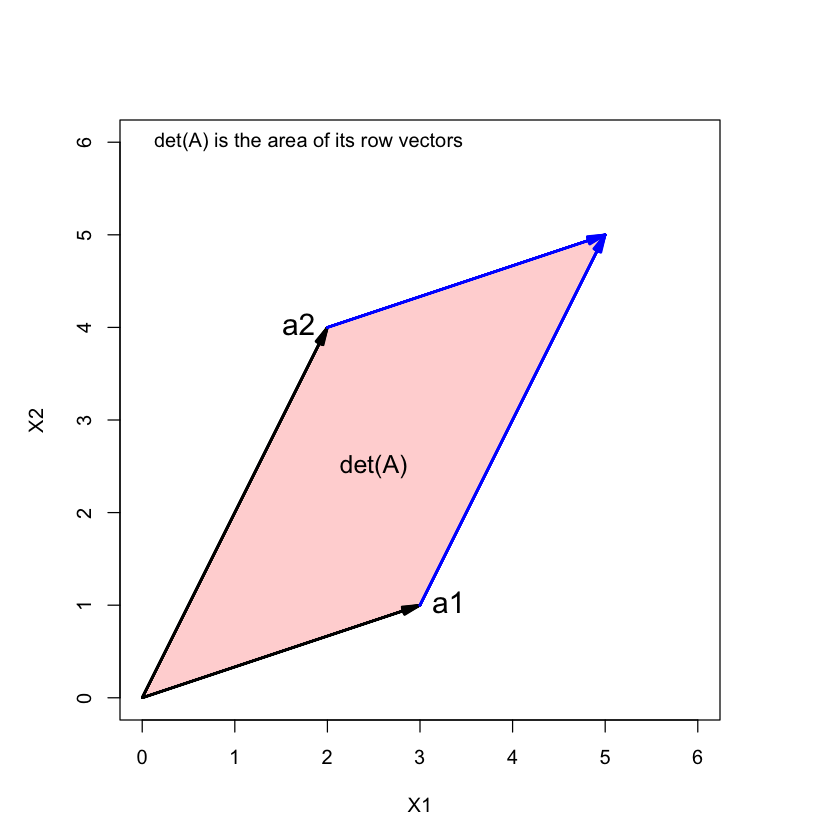

In [23]:
A = matrix(c(3,1,
             2,4), nrow = 2, byrow = TRUE)
print(A)

# set x, y limits
xlim = c(0,6)
ylim = c(0,6)

# set graphics parameters
# set margin
par(mar=c(3,3,1,1)+.1, pin = c(5, 5))
plot(xlim, ylim, type="n", xlab="X1", ylab="X2", asp = 1)

sum = A[1,] + A[2,]
print(A[1,])
print(A[2,])
print(sum)

# A의 rows 에 둘러쌓인 평행사변형 그리기
# 꼭지점 정의
vertex = rbind(c(0,0), A[1,], sum, A[2,])
print(vertex)
polygon(vertex, col=rgb(1,0,0,.2))

vectors(A, labels=(c("a1", "a2")), pos.lab=c(4,2))
vectors(sum, origin = (A[1,]), col="blue")
vectors(sum, origin = (A[2,]), col="blue")

# 범례 표시
text(0,6, "det(A) is the area of its row vectors", pos=4)
text(mean(A[,1]), mean(A[,2]), "det(A)", cex=1.25)

[행렬식에 대한 표현 참조](http://math.stackexchange.com/questions/29128/why-determinant-of-a-2-by-2-matrix-is-the-area-of-a-parallelogram)

대각행렬인 경우 예제

In [24]:
# 대각행렬 

D = 2 * diag(2)
print(D)

     [,1] [,2]
[1,]    2    0
[2,]    0    2


In [25]:
print(det(D))

[1] 4


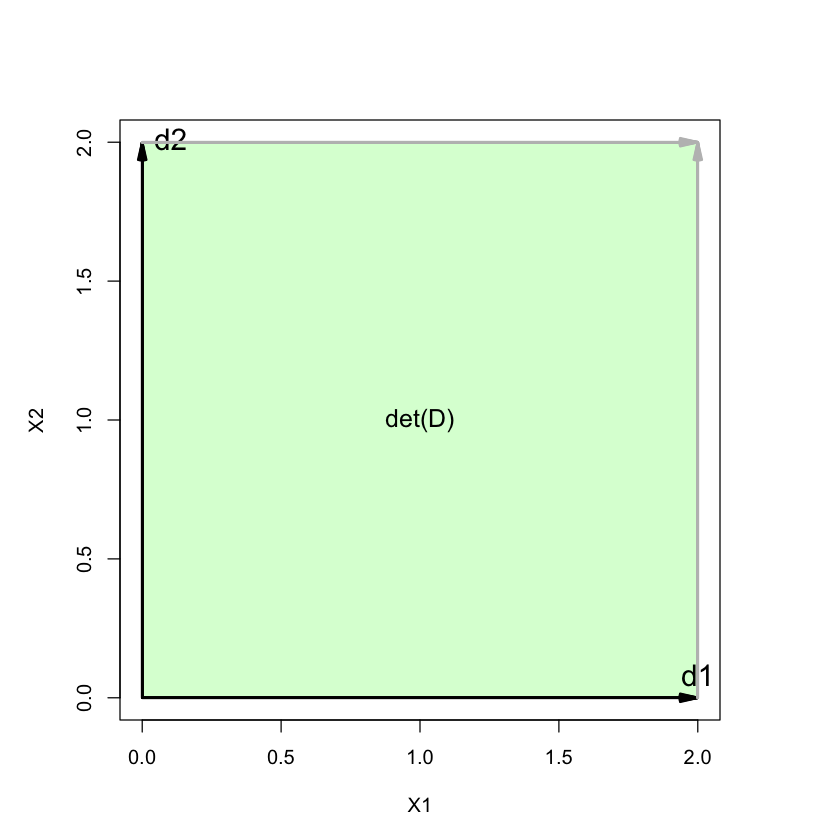

In [26]:
# 그림을 그리면 다음과 같습니다.

par(mar=c(3,3,1,1)+.1, pin = c(5, 5))
plot(c(0,2), c(0,2), type="n", xlab="X1", ylab="X2", asp=1)
sum <- D[1,] + D[2,]
polygon( rbind(c(0,0), D[1,], sum, D[2,]), col=rgb(0,1,0,.2))
vectors(D, labels=c("d1", "d2"), pos.lab=c(3,4))
vectors(sum, origin=D[1,], col="gray")
vectors(sum, origin=D[2,], col="gray")
text(mean(D[,1]), mean(D[,2]), "det(D)", cex=1.25)

rows 나 cols 가 비례인 것이 있으면 행렬식이 0이 되는 이유

In [27]:
B = matrix(c(1,2,2,4), 2,2)
print(B)

     [,1] [,2]
[1,]    1    2
[2,]    2    4


In [28]:
print(det(B))

[1] 0


B(1,) 과 B(2,) 벡터는 동일선상 colinear 이라고 합니다.


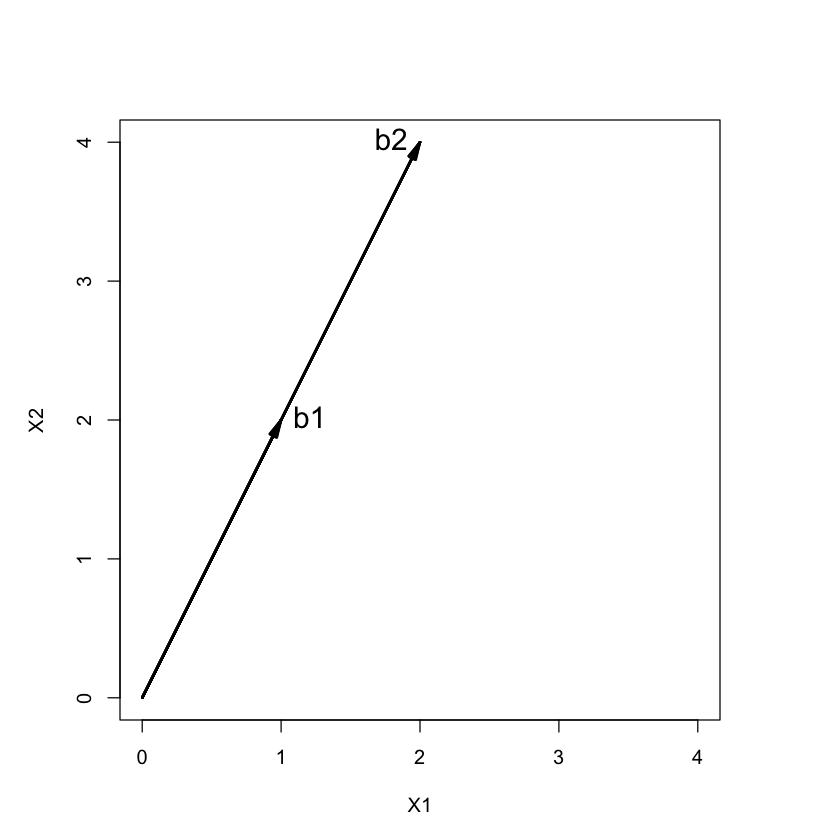

In [29]:
par(mar=c(3,3,1,1)+.1, pin = c(5, 5))
plot(c(0,4), c(0,4), type="n", xlab="X1", ylab="X2", asp=1)
vectors(B, labels=c("b1", "b2"), pos.lab=c(4,2))

#### 고유값, 고유벡터 의 성질 관련 R-code samples

In [30]:
# 2 by 2 matrix
A = matrix(c(-1,0,4,3), 2, 2)
print(A)

     [,1] [,2]
[1,]   -1    4
[2,]    0    3


In [31]:
# eigen value 및 eigen vector 구하기

ev = eigen(A)
print(ev)

eigen() decomposition
$values
[1]  3 -1

$vectors
          [,1] [,2]
[1,] 0.7071068    1
[2,] 0.7071068    0



In [32]:
A = matrix(c(1,0,0,-1,1,0,0,1,-1), 3, 3)
print(A)

     [,1] [,2] [,3]
[1,]    1   -1    0
[2,]    0    1    1
[3,]    0    0   -1


In [33]:
# eigen value 및 eigen vector 구하기

ev = eigen(A)
print(ev)
print(zapsmall(ev$vectors))

eigen() decomposition
$values
[1]  1  1 -1

$vectors
     [,1]         [,2]       [,3]
[1,]    1 1.000000e+00 -0.2182179
[2,]    0 2.220446e-16 -0.4364358
[3,]    0 0.000000e+00  0.8728716

     [,1] [,2]       [,3]
[1,]    1    1 -0.2182179
[2,]    0    0 -0.4364358
[3,]    0    0  0.8728716


$\lambda = -1$ 일 경우 고유벡터 가 -0.22, -0.44, 0,87 인 경우 앞의 예제에서 $\sqrt(1 + 2^2 + 4^2)$ 으로 각 요소를 나눈값입니다. 즉 벡터 길이를 1 로 정규화(normalize) 한 것입니다.

In [34]:
# 앞의 예제 설명과 같은 행렬을 정의

A = matrix(c(5, -4, 4, 12, -11, 12, 4, -4, 5), 3, 3, byrow=TRUE)
print(A)

     [,1] [,2] [,3]
[1,]    5   -4    4
[2,]   12  -11   12
[3,]    4   -4    5


In [35]:
# eigen value 구하기
ev = eigen(A)
print(ev)
values = ev$values
print(values)
vectors = ev$vectors
print(zapsmall(vectors))

eigen() decomposition
$values
[1] -3  1  1

$vectors
           [,1]      [,2]       [,3]
[1,] -0.3015113 0.5345225 -0.5885337
[2,] -0.9045340 0.8017837 -0.7843904
[3,] -0.3015113 0.2672612 -0.1958567

[1] -3  1  1
           [,1]      [,2]       [,3]
[1,] -0.3015113 0.5345225 -0.5885337
[2,] -0.9045340 0.8017837 -0.7843904
[3,] -0.3015113 0.2672612 -0.1958567


* 앞의 예제에서 $\lambda -3$ 일때, 1, 3, 1, $\lambda = 1$ 일때 1, 0, 1 $\lambda = 1$ 일때 0, 1, 1 입니다. 
* $\lambda = -3$ 일 경우에는 -0.3, -0.9, -0.3 은 각각의 요소에 $\sqrt(11)$ 로 나누어 준 값이다.
* $\lambda = 1$ 인 경우 
   * 3차원 공간에서 고유값은 3차 방정식의 해 이므로 $\lambda$ 값은 3개 가 나와야 한다.
   * 그러나 실제 해가 1 또는 2개나 나오는 경우가 있는데, 이 경우 고유값이 중첩이 되었다고 하고, (예제에서 1 이 그 경우에 해당함), 이 경우에는 고유벡터가 scaling 이외에도 선형독립인 고유벡터가 무수히 많이 나올 수 있습니다.
   * 즉 기하학적 해석으로 설명하면, $\lambda = 1$ 이 해당하는 두 고유벡터가 이루는 평면상에서 길이가 1 인 임의 고유벡터 2개를 선택하면 그 벡터는 고유벡터가 됩니다.

In [36]:
# 또 다른 예제

A = matrix(c(13, -4, 2, -4, 11, -2, 2, -2, 8), 3, 3, byrow=TRUE)
print(A)

     [,1] [,2] [,3]
[1,]   13   -4    2
[2,]   -4   11   -2
[3,]    2   -2    8


In [37]:
ev = eigen(A)
values = ev$values
vectors = ev$vectors

print(values)
print(zapsmall(vectors))

[1] 17  8  7
           [,1]       [,2]      [,3]
[1,]  0.7453560  0.6666667 0.0000000
[2,] -0.5962848  0.6666667 0.4472136
[3,]  0.2981424 -0.3333333 0.8944272


### 고유값과 고유벡터의 성질

* 행렬 $\mathbf A$ 를 분해하는데, $\mathbf A = \mathbf V'\mathbf \Lambda \mathbf V$ 형식을 사용합니다.
* $\mathbf V$ 를 eigen vector 로 이루어진 행렬이고, $\mathbf \Lambda = diag(\lambda_1, \lambda_2,\cdots,\lambda_p)$ 로 이루어진 대각선 행렬이고, $\lambda_i$ 는 $\lambda_1 \ge \lambda_2 \ge \cdots \ge \lambda_p$ 인 고유값들입니다.

* 직교행렬 (Orthogonality): $\mathbf V' \mathbf V = \mathbf I$
   * zapsmall() 은 매우 작은 값을 0으로 처리 하는 함수입니다.

In [38]:
# crossprod (X,Y) = t(X)%*% Y or crossprod(X) = t(X) %*% X

print(zapsmall(crossprod(vectors)))

     [,1] [,2] [,3]
[1,]    1    0    0
[2,]    0    1    0
[3,]    0    0    1


##### 1. trace(A) = sum of eigenvalues = $\sum \lambda_i$

In [39]:
# trace A = sum of eigenvalus 
print(tr(A))

[1] 32


In [40]:
print(sum(values))

[1] 32


##### 2. sum of square of A = sum of squares of eigenvalues $\sum \lambda_i^2$

In [41]:
print(A)
print(sum(A))

     [,1] [,2] [,3]
[1,]   13   -4    2
[2,]   -4   11   -2
[3,]    2   -2    8
[1] 24


In [42]:
print(A^2)

     [,1] [,2] [,3]
[1,]  169   16    4
[2,]   16  121    4
[3,]    4    4   64


In [43]:
print(sum(A^2))

[1] 402


In [44]:
print(values)
print(values^2)
print(sum(values^2))

[1] 17  8  7
[1] 289  64  49
[1] 402


##### 3. 행렬식 = 고유값들의 곱 = $det(\mathbf A) = \Pi \lambda_i$.  만일 $\lambda_i = 0$ 이면 행렬식은 0 이됩니다.

In [45]:
print(det(A))

[1] 952


In [46]:
print(prod(values))

[1] 952


##### 4. rank = 0 이 아닌 고유값의 갯수

In [54]:
options(warn = -1)
print(R(A))
options(warn = 0)

[1] 3


In [55]:
print(sum(values != 0))

[1] 3


##### 5. $\mathbf A^{-1}$ 의 고유값은 1 / ($\mathbf A$ 의 고유값) 이고, 고유벡터는 똑같으며 순서는 역순이 된다.

t 함수 : 전치 

det 함수 : 행렬식

solve 함수 : 역행렬 

%*% : 행렬곱 

In [57]:
# 역함수
print(A)

AI = solve(A)
print(AI)

     [,1] [,2] [,3]
[1,]   13   -4    2
[2,]   -4   11   -2
[3,]    2   -2    8
            [,1]       [,2]        [,3]
[1,]  0.08823529 0.02941176 -0.01470588
[2,]  0.02941176 0.10504202  0.01890756
[3,] -0.01470588 0.01890756  0.13340336


In [58]:
print(zapsmall(A %*% AI) )

     [,1] [,2] [,3]
[1,]    1    0    0
[2,]    0    1    0
[3,]    0    0    1


In [61]:
evi = eigen(AI)
evi_values = evi$values
evi_vectors = evi$vectors

In [62]:
print(evi_values)
print(evi_vectors)

[1] 0.14285714 0.12500000 0.05882353
          [,1]       [,2]       [,3]
[1,] 0.0000000  0.6666667  0.7453560
[2,] 0.4472136  0.6666667 -0.5962848
[3,] 0.8944272 -0.3333333  0.2981424


In [63]:
ev = eigen(A)
ev_values = ev$values
ev_vectors = ev$vectors

In [64]:
print(ev_values)
print(ev_vectors)

[1] 17  8  7
           [,1]       [,2]      [,3]
[1,]  0.7453560  0.6666667 0.0000000
[2,] -0.5962848  0.6666667 0.4472136
[3,]  0.2981424 -0.3333333 0.8944272


In [74]:
print(sort(ev_values^(-1), decreasing = TRUE))

[1] 0.14285714 0.12500000 0.05882353
